**TOKENIZATION** 

First step of our journey is to TOKENIZE our Emails.

In [6]:
import csv
import re

Deleting the bad format inputs and return every words in the document.

In [7]:
def tokenize_email(text):
    words = re.findall(r'[a-zA-Z0-9]+', text)
    return [word.lower() for word in words]


Proccessing the .CSV input file.

In [8]:
input_path = './data/emails.csv'
output_path = './data/emails_tokenized.csv'

with open(input_path, 'r', encoding='utf-8') as infile, \
     open(output_path, 'w', encoding='utf-8', newline='') as outfile:

    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    writer.writerow(['tokens', 'spam'])
    
    next(reader, None)
    
    for row in reader:
        if len(row) < 2:
            continue
            
        text, label = row[0], row[1]
        tokens = tokenize_email(text)
        
        writer.writerow([tokens, label])

print("All done and saved in ",output_path)

All done and saved in  ./data/emails_tokenized.csv


**VECTORIZATION**



In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import save_npz

Reading the tokenized data and transforming it to **LIST**

In [10]:

tokenized_path = './data/emails_tokenized.csv'
df = pd.read_csv(tokenized_path)

df['tokens'] = df['tokens'].apply(eval)

vectorizing features with 2 way 

**#1** Count Vectorization

In [11]:
count_vectorizer = CountVectorizer(
    tokenizer=lambda x: x,  # استفاده از توکن‌های از پیش پردازش شده
    preprocessor=lambda x: x,  # عدم پیش‌پردازش اضافی
    binary=False,  # حالت شمارشی
    min_df=2  # نادیده گرفتن کلماتی که کمتر از ۲ بار ظاهر شده‌اند
)
X_count = count_vectorizer.fit_transform(df['tokens'])

/home/acontius/amin/Bamdad_Ai/Bamdad/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**#2** Binarry Vectorization

In [12]:
binary_vectorizer = CountVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    binary=True, 
    min_df=2
)
X_binary = binary_vectorizer.fit_transform(df['tokens'])

Saving the **results** 

In [13]:
save_npz('./data/features_count.npz', X_count)
save_npz('./data/features_binary.npz', X_binary)


np.save('./data/labels.npy', df['spam'].values)


vocabulary = count_vectorizer.get_feature_names_out()
pd.Series(vocabulary).to_csv('./data/vocabulary.csv', index=False)

In [14]:
print(f"All features : {len(vocabulary)}")
print(f"Count : {X_count.shape}")
print(f"Binarry : {X_binary.shape}")

All features : 20303
Count : (5728, 20303)
Binarry : (5728, 20303)


In [15]:
from scipy.sparse import csr_matrix
import numpy as np

small_count = X_count[:5, :10].toarray()
small_binary = X_binary[:5, :10].toarray()

print("Count Matrix Sample:")
print(small_count)
print("\nBinary Matrix Sample:")
print(small_binary)

Count Matrix Sample:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Binary Matrix Sample:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Generating a high res fig of our data

In [16]:
from pathlib import Path
import matplotlib.pyplot as plt

In [17]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**Data itself**

In [18]:
print(df)

                                                 tokens  spam
0     [subject, naturally, irresistible, your, corpo...     1
1     [subject, the, stock, trading, gunslinger, fan...     1
2     [subject, unbelievable, new, homes, made, easy...     1
3     [subject, 4, color, printing, special, request...     1
4     [subject, do, not, have, money, get, software,...     1
...                                                 ...   ...
5723  [subject, re, research, and, development, char...     0
5724  [subject, re, receipts, from, visit, jim, than...     0
5725  [subject, re, enron, case, study, update, wow,...     0
5726  [subject, re, interest, david, please, call, s...     0
5727  [subject, news, aurora, 5, 2, update, aurora, ...     0

[5728 rows x 2 columns]


**Value Count**

In [19]:
print(df['spam'].value_counts())
print(df.columns)

spam
0    4360
1    1368
Name: count, dtype: int64
Index(['tokens', 'spam'], dtype='object')


# Generating Fig

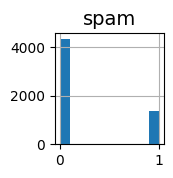

In [20]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=10, figsize=(2, 2))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

**Ceate a Test Set**

In [21]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
print(len(train_set),len(test_set))

4583 1145


In [23]:
print(df.applymap)

<bound method DataFrame.applymap of                                                  tokens  spam
0     [subject, naturally, irresistible, your, corpo...     1
1     [subject, the, stock, trading, gunslinger, fan...     1
2     [subject, unbelievable, new, homes, made, easy...     1
3     [subject, 4, color, printing, special, request...     1
4     [subject, do, not, have, money, get, software,...     1
...                                                 ...   ...
5723  [subject, re, research, and, development, char...     0
5724  [subject, re, receipts, from, visit, jim, than...     0
5725  [subject, re, enron, case, study, update, wow,...     0
5726  [subject, re, interest, david, please, call, s...     0
5727  [subject, news, aurora, 5, 2, update, aurora, ...     0

[5728 rows x 2 columns]>


In [24]:
np.random.seed(42)

In [25]:
from zlib import crc32

In [26]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [27]:
emails_with_id = df.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(emails_with_id, 0.2, "index")

In [28]:
df['index'] = df.index

In [29]:
emails_with_id["id"] = df['index'] * 1000 + df['spam']
train_set, test_set = split_data_with_id_hash(emails_with_id, 0.2, "id")

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

**Visualization**

!Making a copy of train to the df to not letting the model to see the tests.

In [32]:
df = train_set.copy()

calculating email's length and seperate spams and hams!

In [33]:
spam_counts = df['spam'].value_counts().reset_index()
spam_counts.columns = ['spam', 'count']

Creating the plot and save it !

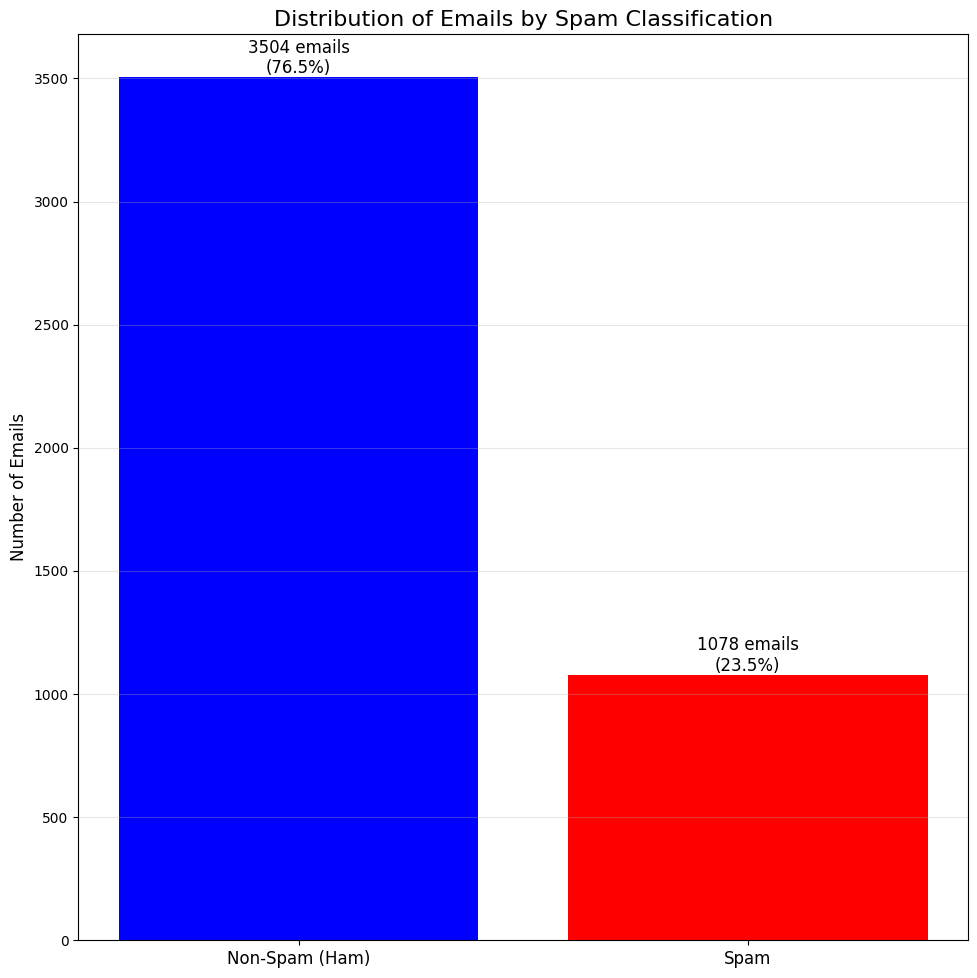

In [34]:
plt.figure(figsize=(10, 10))
bars = plt.bar(['Non-Spam (Ham)', 'Spam'], 
               spam_counts['count'], 
               color=['blue', 'red'])

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height} emails\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12)

# Add plot elements
plt.title('Distribution of Emails by Spam Classification', fontsize=16)
plt.ylabel('Number of Emails', fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("./images/email_counts.png", dpi=300)
plt.show()

Extra code for Future if we could use the date or time for better experience!


In [35]:
# # Convert to datetime if needed
# # df['date'] = pd.to_datetime(df['date'])

# # Group by time period (e.g., daily counts)
# daily_counts = df.groupby([df['date'].dt.date, 'spam']).size().unstack()

# # Plot time series
# daily_counts.plot(figsize=(12, 6), color=['blue', 'red'])
# plt.title('Daily Email Counts by Classification')
# plt.ylabel('Number of Emails')
# plt.grid(alpha=0.3)
# plt.savefig("daily_email_counts.png")
# plt.show()

this code is written by AI to for correlations and finding most used words in spams!

Original X_binary shape: (4582, 18076)
Original y shape: (4582,)

Computing phi coefficients...
Phi coefficient calculation complete!

Top 10 spam indicators:
           word       phi
17297     vince  0.538304
6419      enron  0.500109
3712         cc  0.431096
8497          i  0.424914
9503   kaminski  0.397970
2070         am  0.351010
12675        pm  0.348578
396        2000  0.344282
6080        ect  0.343242
13551        re  0.332392

Top 10 ham indicators:
             word  phi
13838    reliably  0.0
13800  reinstated  0.0
13799   reinstate  0.0
13826    relaxing  0.0
3076           bl  0.0
3072       bjarne  0.0
3069       bitter  0.0
3067       bitmap  0.0
13844      relies  0.0
10272      lpharr  0.0


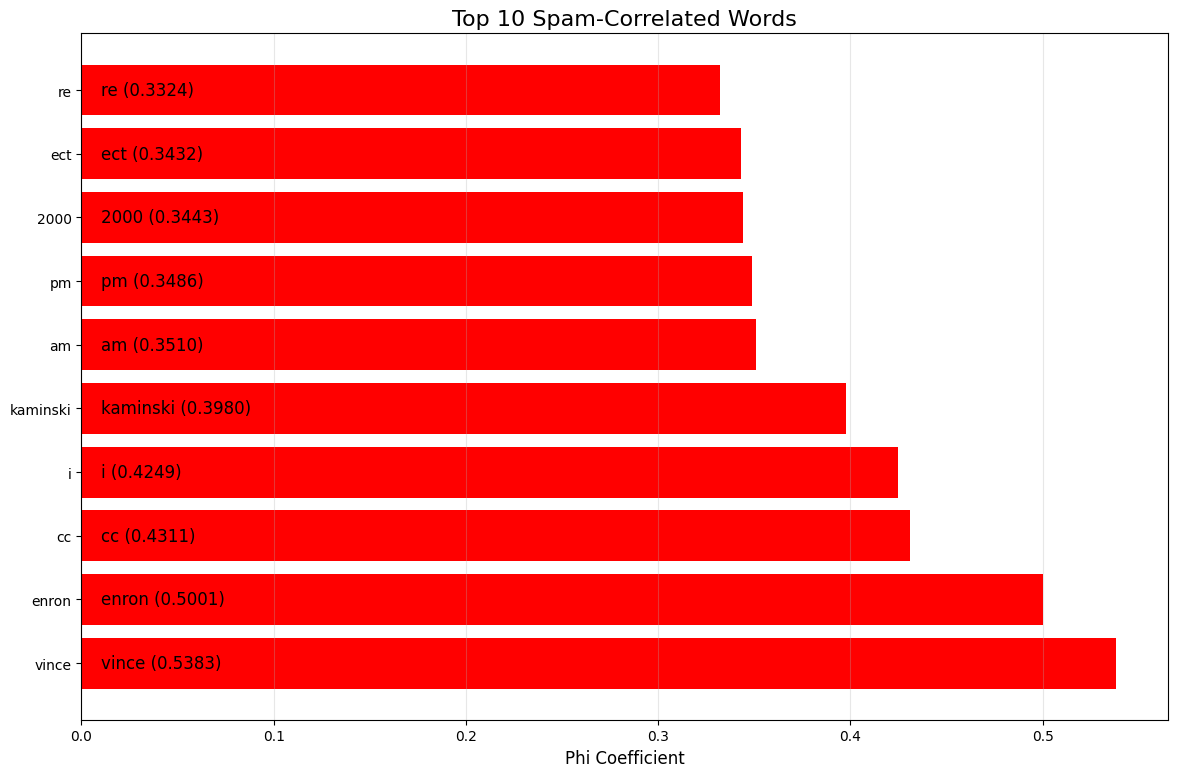

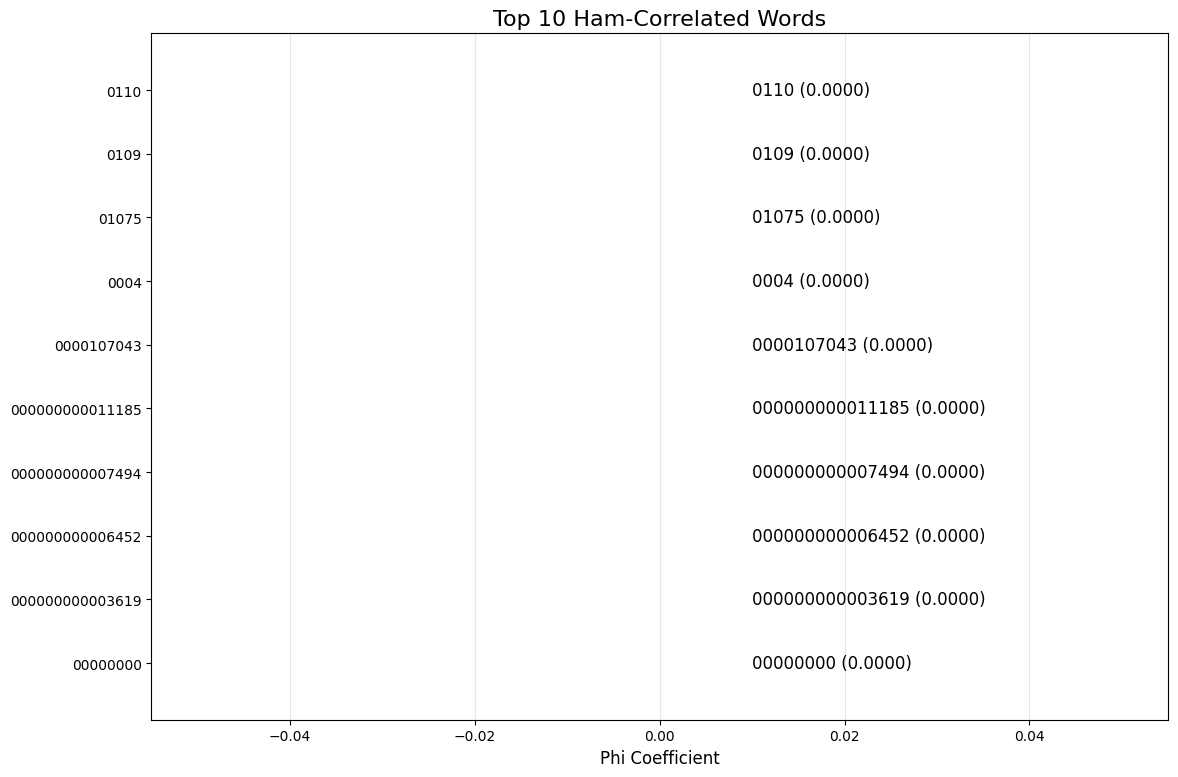

Correlation analysis completed successfully!


In [ ]:
from scipy.stats import chi2_contingency
from sklearn.feature_extraction.text import CountVectorizer

# 1. Verify dimensions
print(f"Original X_binary shape: {X_binary.shape}")
print(f"Original y shape: {df['spam'].values.shape}")

# 2. Fix dimension mismatch
if X_binary.shape[0] != len(df):
    print("\nDimension mismatch detected! Re-aligning data...")
    
    # Reset indices to ensure alignment
    df = df.reset_index(drop=True)
    
    # Recreate vectorizer with fixed data
    print("Recreating vectorizer with current data...")
    binary_vectorizer = CountVectorizer(
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        binary=True,
        min_df=2
    )
    X_binary = binary_vectorizer.fit_transform(df['tokens'])
    print(f"New X_binary shape: {X_binary.shape}")
    print(f"New y shape: {df['spam'].values.shape}")

# 3. Optimized phi coefficient calculation
def phi_coefficient(X, y):
    """Compute phi coefficients efficiently"""
    n_features = X.shape[1]
    phi = np.zeros(n_features)
    
    # Precompute y conditions
    y1 = (y == 1)  # Spam emails
    y0 = (y == 0)  # Ham emails
    
    for i in range(n_features):
        # Convert sparse column to dense array
        feature_col = X[:, i]
        feature_present = feature_col.toarray().flatten().astype(bool)
        
        # Build contingency table
        tp = np.sum(feature_present & y1)  # Spam with word
        tn = np.sum(~feature_present & y0)  # Ham without word
        fp = np.sum(feature_present & y0)  # Ham with word
        fn = np.sum(~feature_present & y1)  # Spam without word
        
        # Skip if no variation
        if tp + fp == 0 or tn + fn == 0:
            phi[i] = 0
            continue
            
        contingency = np.array([[tp, fp], [fn, tn]])
        try:
            chi2, _, _, _ = chi2_contingency(contingency)
            n = np.sum(contingency)
            phi[i] = np.sqrt(chi2 / n) if n > 0 else 0
        except:
            phi[i] = 0
            
    return phi

# 4. Compute phi coefficients
print("\nComputing phi coefficients...")
phi_values = phi_coefficient(X_binary, df['spam'].values)
print("Phi coefficient calculation complete!")

# 5. Create results dataframe
vocab = binary_vectorizer.get_feature_names_out()
phi_df = pd.DataFrame({'word': vocab, 'phi': phi_values})

# 6. Show top correlations
print("\nTop 10 spam indicators:")
print(phi_df.sort_values('phi', ascending=False).head(10))

print("\nTop 10 ham indicators:")
print(phi_df.sort_values('phi').head(10))

# 7. Visualize top correlations
# Top 10 spam words
top_spam = phi_df.nlargest(10, 'phi')
plt.figure(figsize=(12, 8))
plt.barh(top_spam['word'], top_spam['phi'], color='red')
plt.title('Top 10 Spam-Correlated Words', fontsize=16)
plt.xlabel('Phi Coefficient', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (word, phi) in enumerate(zip(top_spam['word'], top_spam['phi'])):
    plt.text(0.01, i, f'{word} ({phi:.4f})', va='center', fontsize=12)

plt.tight_layout()
save_fig("top_spam_words")
plt.show()

# Top 10 ham words
top_ham = phi_df.nsmallest(10, 'phi')
plt.figure(figsize=(12, 8))
plt.barh(top_ham['word'], top_ham['phi'], color='blue')
plt.title('Top 10 Ham-Correlated Words', fontsize=16)
plt.xlabel('Phi Coefficient', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (word, phi) in enumerate(zip(top_ham['word'], top_ham['phi'])):
    plt.text(0.01, i, f'{word} ({phi:.4f})', va='center', fontsize=12)

plt.tight_layout()
save_fig("top_ham_words")
plt.show()

print("Correlation analysis completed successfully!")

**DATA CLEANING**

In [42]:
df = df.drop("index", axis=1)

no null was found !

In [43]:
df_null = df.isnull().any(axis=1)
df.loc[df_null].head()

,tokens,spam
